# Imports de llibreries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import datetime

# Càrrega dels datasets

In [3]:
df_proposals = pd.read_csv("./data/participa.gencat.cat-open-data-proposals.csv")
df_comments = pd.read_csv("./data/participa.gencat.cat-open-data-proposal_comments.csv")

# Exploratory Data Analysis

In [4]:
print(df_proposals.columns)
print(f"Nombre de columnes: {len(df_proposals.columns)}")
print(f"Dimensió del dataset: {df_proposals.shape}")

Index(['id', 'category/id', 'category/name/ca', 'category/name/es',
       'category/name/oc', 'scope/id', 'scope/name/en', 'scope/name/ca',
       'scope/name/es', 'scope/name/oc', 'participatory_space/id',
       'participatory_space/url', 'component/id', 'title/ca', 'body/ca',
       'address', 'latitude', 'longitude', 'state', 'reference', 'answer/en',
       'answer/ca', 'answer/es', 'answer/oc', 'supports',
       'endorsements/total_count', 'endorsements/user_endorsements',
       'comments', 'attachments', 'followers', 'published_at', 'url',
       'meeting_urls', 'related_proposals', 'is_amend',
       'original_proposal/title', 'original_proposal/url', 'category/name/en',
       'title/oc', 'body/oc', 'title/es', 'body/es',
       'original_proposal/title/ca', 'title/en', 'body/en'],
      dtype='object')
Nombre de columnes: 45
Dimensió del dataset: (10440, 45)


Observem que el dataset de propostes té 45 columnes diferents i un total de 10440 files. Per poder seleccionar només les files que ens interessen, agafarem el subset que tingui la url de l'espai participatori corresponent a l'Assemblea Ciutadana pel Clima de Catalunya. En aquest cas és la columna `participatory_space/url`, i la url en concret `http://participa.gencat.cat/processes/assembleaclima?participatory_process_slug=assembleaclima`.

In [5]:
df_proposals = df_proposals[df_proposals['participatory_space/url'] == 'http://participa.gencat.cat/processes/assembleaclima?participatory_process_slug=assembleaclima']
print(f"Nombre de propostes: {len(df_proposals)}")
df_proposals.head(5)

Nombre de propostes: 59


,id,category/id,category/name/ca,category/name/es,category/name/oc,scope/id,scope/name/en,scope/name/ca,scope/name/es,scope/name/oc,...,original_proposal/title,original_proposal/url,category/name/en,title/oc,body/oc,title/es,body/es,original_proposal/title/ca,title/en,body/en
9622,87446,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9623,87447,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9624,87450,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9625,87451,2541.0,Model d'alimentació pel futur,Modelo de alimentación para el futuro,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9626,87452,2541.0,Model d'alimentació pel futur,Modelo de alimentación para el futuro,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observem a primera vista que existeixen moltes columnes on els valors són NaNs i que potser no ens interessen gaire. Per tant, doncs, eliminem les columnes que continguin íntegrament valors NaNs.

In [6]:
df_proposals = df_proposals.dropna(axis=1)
df_proposals = df_proposals.reset_index(drop=True)
print(f"Nou nombre de columnes: {len(df_proposals.columns)}")
df_proposals.head(1)

Nou nombre de columnes: 15


,id,participatory_space/id,participatory_space/url,component/id,title/ca,body/ca,reference,supports,endorsements/total_count,comments,attachments,followers,published_at,url,is_amend
0,87446,562,http://participa.gencat.cat/processes/assemble...,3827,Participar Assemblea Ciutadana pel Clima de Ca...,"Buenos días, me gustaría participar en la asam...",II-PROP-2023-10-87446,0,4,0,0,2,2023-10-09 13:27:07 +0200,http://participa.gencat.cat/processes/assemble...,False


Un cop eliminades les columnes que només contenien valors NaNs, es redueix el nombre de columnes de 45 a només 15. Una reducció significativa.
Seguim amb el tractament ara del dataset dels comentaris a les propostes.

In [7]:
print(df_comments.columns)
print(f"Nombre de columnes: {len(df_comments.columns)}")
print(f"Dimensió del dataset: {df_comments.shape}")

Index(['id', 'created_at', 'body', 'locale', 'author/id', 'author/name',
       'alignment', 'depth', 'user_group/id', 'user_group/name/en',
       'user_group/name/ca', 'user_group/name/es', 'user_group/name/oc',
       'commentable_id', 'commentable_type', 'root_commentable_url'],
      dtype='object')
Nombre de columnes: 16
Dimensió del dataset: (5171, 16)


Observem que existeixen 16 columnes diferents al dataset i que té 5171 files. Una de les columnes és `commentable_id`, que sembla que és la id de la proposta a la que pertany cada comentari. Així doncs, agafem un subset que contingui només les que coincideixin.

In [8]:
df_comments = df_comments[df_comments['commentable_id'].isin(df_proposals['id'])]
print(f"Nombre de comentaris a les propostes: {len(df_comments)}")
df_comments.head(3)

Nombre de comentaris a les propostes: 14


,id,created_at,body,locale,author/id,author/name,alignment,depth,user_group/id,user_group/name/en,user_group/name/ca,user_group/name/es,user_group/name/oc,commentable_id,commentable_type,root_commentable_url
4937,53292,2023-10-12 10:55:08 +0200,L'emergència climàtica ens afecta a tots els h...,ca,58730,JORGE MANUEL,0,0,NaN,NaN,NaN,NaN,NaN,87447,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
4938,53315,2023-10-17 15:30:13 +0200,Penso el mateix. A més us esteu gastant uns di...,ca,59090,MARC,1,0,NaN,NaN,NaN,NaN,NaN,87461,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
4939,53323,2023-10-19 19:59:58 +0200,Molt d'acord,ca,59319,Jordi Sanjuan Fuentes,1,0,NaN,NaN,NaN,NaN,NaN,87468,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...


En aquest cas, observem que només hi han 14 comentaris a les 59 propostes totals.

In [9]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 4937 to 4952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14 non-null     int64  
 1   created_at            14 non-null     object 
 2   body                  14 non-null     object 
 3   locale                14 non-null     object 
 4   author/id             14 non-null     int64  
 5   author/name           14 non-null     object 
 6   alignment             14 non-null     int64  
 7   depth                 14 non-null     int64  
 8   user_group/id         0 non-null      float64
 9   user_group/name/en    0 non-null      float64
 10  user_group/name/ca    0 non-null      float64
 11  user_group/name/es    0 non-null      float64
 12  user_group/name/oc    0 non-null      float64
 13  commentable_id        14 non-null     int64  
 14  commentable_type      14 non-null     object 
 15  root_commentable_url  14 

Tal com passava amb el dataset de les propostes, existeixen unes quantes columnes amb únicament valors NaN, per tant les eliminem i aconseguim reduir el nombre a 11 columnes.

In [10]:
df_comments = df_comments.dropna(axis=1)
print(f"Nou nombre de columnes: {len(df_comments.columns)}")
df_comments = df_comments.reset_index(drop=True)
df_comments.head(3)

Nou nombre de columnes: 11


,id,created_at,body,locale,author/id,author/name,alignment,depth,commentable_id,commentable_type,root_commentable_url
0,53292,2023-10-12 10:55:08 +0200,L'emergència climàtica ens afecta a tots els h...,ca,58730,JORGE MANUEL,0,0,87447,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
1,53315,2023-10-17 15:30:13 +0200,Penso el mateix. A més us esteu gastant uns di...,ca,59090,MARC,1,0,87461,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
2,53323,2023-10-19 19:59:58 +0200,Molt d'acord,ca,59319,Jordi Sanjuan Fuentes,1,0,87468,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...


## Anàlisi dels atributs

### Propostes

#### Id

In [11]:
print(type(df_proposals['id'][0]))
print(len(df_proposals['id']) == df_proposals['id'].nunique())

<class 'numpy.int64'>
True


La columna `id` conté valors numèrics i és un identificador únic de cada proposta diferent. No existeixen ids repetits.

#### Published_at

In [58]:
print(type(df_proposals['published_at'][0]))
df_proposals['published_at'] = pd.to_datetime(df_proposals['published_at'], utc=True)
print(f"Primera proposta en data: {min(df_proposals['published_at'])}")
print(f"Última proposta en data: {max(df_proposals['published_at'])}")

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Primera proposta en data: 2023-10-09 11:27:07+00:00
Última proposta en data: 2024-02-10 09:56:54+00:00


Transformem les dades de la columna `published_at` de string a datetime per poder treballar millor i observem que han passat 4 mesos i 1 dia entre la primera proposta i la última.

In [13]:
# Preparem 4 subsets per fer un plot de la sèrie temporal de cada mes, ja que en total hi ha 4 mesos.
max_data_mes1 = pd.to_datetime('2023-11-09', utc=True)
max_data_mes2 = pd.to_datetime('2023-12-09', utc=True)
max_data_mes3 = pd.to_datetime('2024-01-09', utc=True)
max_data_mes4 = max(df_proposals['published_at'])


df_plot1 = df_proposals[df_proposals['published_at'] <= max_data_mes1]
df_plot2 = df_proposals[(df_proposals['published_at'] >= max_data_mes1) & (df_proposals['published_at'] <= max_data_mes2)]
df_plot3 = df_proposals[(df_proposals['published_at'] >= max_data_mes2) & (df_proposals['published_at'] <= max_data_mes3)]
df_plot4 = df_proposals[(df_proposals['published_at'] >= max_data_mes3) & (df_proposals['published_at'] <= max_data_mes4)]
df_plot1 = df_plot1.reset_index(drop=True)
df_plot2 = df_plot2.reset_index(drop=True)
df_plot3 = df_plot3.reset_index(drop=True)
df_plot4 = df_plot4.reset_index(drop=True)

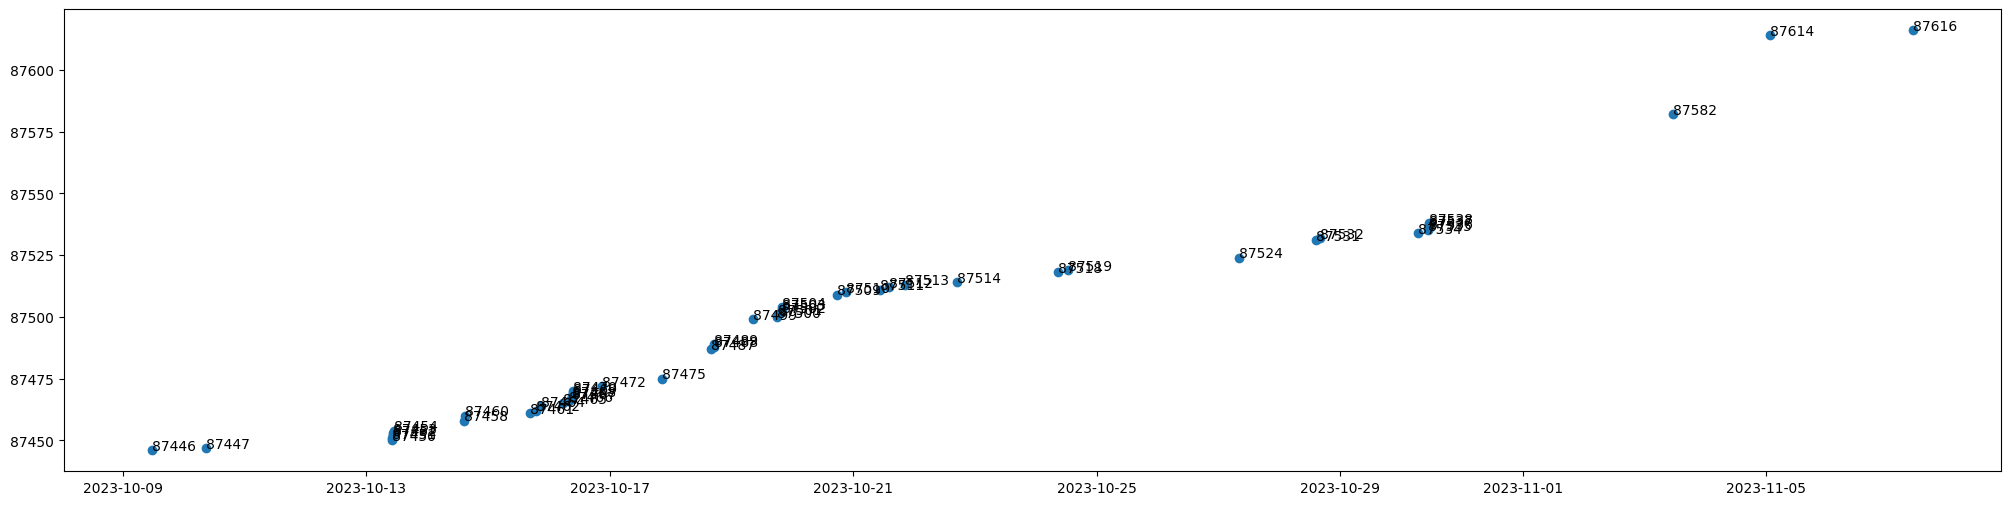

In [14]:
fig, ax = plt.subplots(figsize=(25,6))
ax.scatter(df_plot1['published_at'], df_plot1['id'])

for i, txt in enumerate(df_plot1['id']):
    ax.annotate(txt, (df_plot1['published_at'][i], df_plot1['id'][i]))

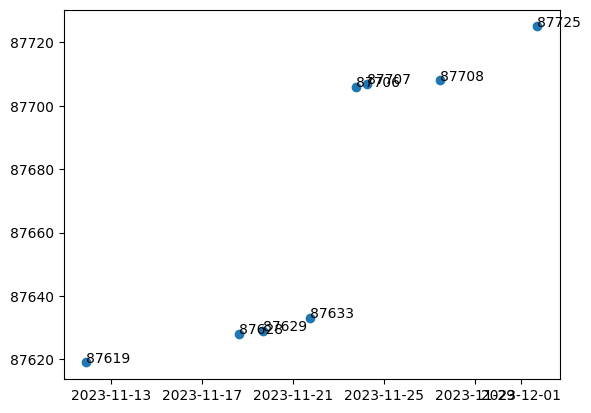

In [15]:
fig, ax = plt.subplots()
ax.scatter(df_plot2['published_at'], df_plot2['id'])

for i, txt in enumerate(df_plot2['id']):
    ax.annotate(txt, (df_plot2['published_at'][i], df_plot2['id'][i]))

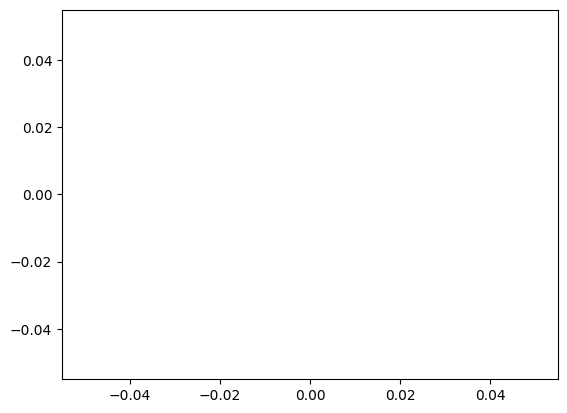

In [16]:
fig, ax = plt.subplots()
ax.scatter(df_plot3['published_at'], df_plot3['id'])

for i, txt in enumerate(df_plot3['id']):
    ax.annotate(txt, (df_plot3['published_at'][i], df_plot3['id'][i]))

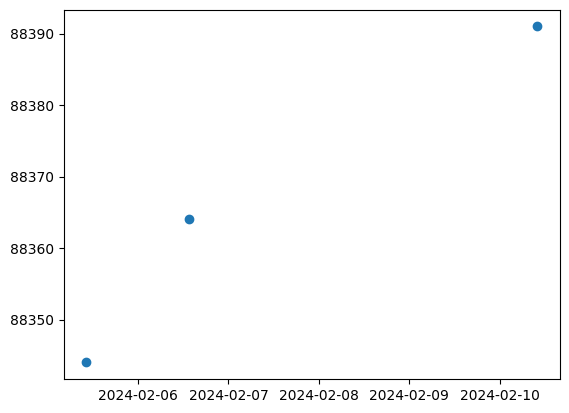

In [17]:
fig, ax = plt.subplots()
ax.scatter(df_plot4['published_at'], df_plot4['id'])

for i, txt in enumerate(df_plot3['id']):
    ax.annotate(txt, (df_plot4['published_at'][i], df_plot4['id'][i]))

In [18]:
print(f"Total propostes primer mes: {len(df_plot1)}")
print(f"Total propostes segon mes: {len(df_plot2)}")
print(f"Total propostes tercer mes: {len(df_plot3)}")
print(f"Total propostes quart mes: {len(df_plot4)}")

Total propostes primer mes: 48
Total propostes segon mes: 8
Total propostes tercer mes: 0
Total propostes quart mes: 3


Es pot observar clarament que durant el primer mes de l'Assemblea Ciutadana pel Clima de Catalunya, hi va haver moltíssimes més propostes que a la resta de mesos, amb 48 propostes. Al segon mes només es va rebre 8 propostes noves, al tercer mes absolutament cap, i finalment al quart mes, només 3 propostes. Veiem per tant que el procés participatiu va tenir una forta arrancada però el ritme de participació va disminuir a mesura que el temps avançava.

#### Participatory_space/id

In [19]:
print(df_proposals['participatory_space/id'].nunique())
print(df_proposals['participatory_space/id'].unique())
print(type(df_proposals['participatory_space/id'][0]))

1
[562]
<class 'numpy.int64'>


La columna `participatory_space/id` conté el número identificador únic del programa de Decidim amb el que especifica a quin procés participatiu pertany la proposta. Tal com s'observa, totes les files tenen el mateix valor en aquesta columna ja que treballem només amb les propostes que pertanyen a l'Assemblea pel Clima, amb identificador 562.

#### Participatoy_space/url

In [20]:
print(df_proposals['participatory_space/url'].nunique())
print(df_proposals['participatory_space/url'].unique())
print(type(df_proposals['participatory_space/url'][0]))

1
['http://participa.gencat.cat/processes/assembleaclima?participatory_process_slug=assembleaclima']
<class 'str'>


De la mateixa manera que la columna anterior, `participatory_space/url` conté la url en format string associada al procés participatiu al que pertany la proposta. En aquest cas veiem que totes les propostes tenen la mateixa url. Això ens indica que, evidentment, estem treballant només amb propostes que pertanyen a l'Assemblea Ciutadana pel Clima de Catalunya.

#### Component/id

In [21]:
print(df_proposals['component/id'].nunique())
print(df_proposals['component/id'].unique())
print(type(df_proposals['component/id'][0]))

1
[3827]
<class 'numpy.int64'>


La columna `component/id` representa el número identificador únic del component a l'app de Decidim. En aquest cas representa el component Proposals, que no és més que un contenidor de propostes per a un procés participatiu concret. Com que totes les propostes pertanyen al mateix procés, pertanyen al mateix component Proposals i per això a la columna només hi ha un únic valor que es repeteix.

#### Title/ca

In [22]:
print(df_proposals['title/ca'].unique())
print(df_proposals['title/ca'].nunique())
print(len(df_proposals))
print(type(df_proposals['title/ca'][0]))

['Participar Assemblea Ciutadana pel Clima de Catalunya'
 'Assemblea ciutadana pel clima de Catalunya'
 'Municipi a municipi, empresa a empresa, família a família'
 'Transició a producció, comerç i consum ecològics locals'
 "L'aigua, el principal aliment."
 'Prohibir construccions no bioclimàtiques' 'Projectes del futur'
 "Ordenació medioambiental. Tractament dels residus. Circuit d'aigües. Aprofitament forestal. Producció energètica. "
 'Procés de selecció '
 'Decreixement, Aigua i Sobirania alimentària agroecològica'
 "Apropament entre generació i consum d'energia en polígons industrials"
 'Participació a l’assemblea'
 'Explotació racional i SOLIDÀRIA dels boscos'
 'Compensació obligatòria de les emissions de cotxe i avió'
 "Desplegament xarxa d'hidrogen i punts de càrrega de vehicles elèctrics arreu"
 'Sistema de calculadora/compensació rural efectiva d\'emissions CO2 on s\'hi sumi el CO2 "netejat" pels boscos en propietat'
 "Prioritzar el desplegament d'energia renovable en terreny

La columna `title/ca` conté el títol de la proposta en català i es tracta d'un camp de tipus string. Es pot observar que de les 59 propostes que té el dataset, hi ha només 58 títols diferents, per tant vol dir que existeixen dues propostes amb el mateix títol. Podria ser casualitat i que compartissin el mateix títol o que existeix una proposta duplicada.

#### Body/ca

In [23]:
print(df_proposals['body/ca'].unique())
print(df_proposals['body/ca'].nunique())
print(len(df_proposals))
print(type(df_proposals['body/ca'][0]))

['Buenos días, me gustaría participar en la asamblea ciudadana para\nel clima de Cataluña.\n\nEs un tema de mucho interés y actual, que me interesa bastante, y\nasí poder aportar mi granito de arena.\n\nMuchas gracias,'
 "M'agradaria participar en aquesta assemblea pel clima, en cas que\nno rebi la carta aleatòria.\n\nÉs un tema que m'interessa moltíssim i em poso a disposició per a\npoder participar.\n\nGràcies."
 "Cada municipi (empresa i família) ha de rebre recursos per\nplanificar reducció i eficiència consum de matèries, aliments,\naigua i energia, alhora que la seva consecució estable, propera i\nsostenible en el temps. A partir de les accions i resultats ha de\nrebre més suport fiscal que els que no. El barem ha de ser tècnic\ni transparent i ha d'incloure criteris de justícia social. Alhora\nha de contemplar el grau de solidaritat en excedents envers\npoblacions (empreses/famílies) veïnes properes."
 "La producció, comerç i consum d'aliments no ecològics i no locals\nhaurien d

La columna `body/ca` conté un string amb el text de la proposta. S'observa que existeixen 57 textos de propostes diferents però hi ha 59 propostes en total, i per tant, com s'ha vist a l'apartat anterior, sí que el dataset conté duplicats.

#### Reference

In [24]:
print(df_proposals['reference'].unique())
print(df_proposals['reference'].nunique())
print(type(df_proposals['reference']))

['II-PROP-2023-10-87446' 'II-PROP-2023-10-87447' 'II-PROP-2023-10-87450'
 'II-PROP-2023-10-87451' 'II-PROP-2023-10-87452' 'II-PROP-2023-10-87453'
 'II-PROP-2023-10-87454' 'II-PROP-2023-10-87458' 'II-PROP-2023-10-87460'
 'II-PROP-2023-10-87461' 'II-PROP-2023-10-87462' 'II-PROP-2023-10-87464'
 'II-PROP-2023-10-87465' 'II-PROP-2023-10-87466' 'II-PROP-2023-10-87467'
 'II-PROP-2023-10-87468' 'II-PROP-2023-10-87469' 'II-PROP-2023-10-87470'
 'II-PROP-2023-10-87472' 'II-PROP-2023-10-87475' 'II-PROP-2023-10-87487'
 'II-PROP-2023-10-87488' 'II-PROP-2023-10-87489' 'II-PROP-2023-10-87499'
 'II-PROP-2023-10-87500' 'II-PROP-2023-10-87501' 'II-PROP-2023-10-87502'
 'II-PROP-2023-10-87503' 'II-PROP-2023-10-87504' 'II-PROP-2023-10-87509'
 'II-PROP-2023-10-87510' 'II-PROP-2023-10-87511' 'II-PROP-2023-10-87512'
 'II-PROP-2023-10-87513' 'II-PROP-2023-10-87514' 'II-PROP-2023-10-87518'
 'II-PROP-2023-10-87519' 'II-PROP-2023-10-87524' 'II-PROP-2023-10-87531'
 'II-PROP-2023-10-87532' 'II-PROP-2023-10-87534' 'I

La columna `reference` conté un string associat a la referència única per la que es pot trobar cada proposta, tal com si es tractés d'un ESBN. S'observa que, evidentment, existeixen tantes referències úniques com propostes hi ha.

#### Supports

In [25]:
print(df_proposals['supports'].unique())
print(df_proposals['supports'].nunique())
print(type(df_proposals['supports']))

[0]
1
<class 'pandas.core.series.Series'>


La columna `supports` representa el nombre de suports que ha obtingut la proposta. S'observa que totes les files de la columna tenen valor 0 i que aquest és l'únic valor que existeix.

#### Endorsements/total_count

In [26]:
print(df_proposals['endorsements/total_count'].unique())
print(df_proposals['endorsements/total_count'].nunique())
print(type(df_proposals['endorsements/total_count'][0]))
print(f"Màxim nombre de sponsors: {max(df_proposals['endorsements/total_count'])}")
print(f"Mínim nombre de sponsors: {min(df_proposals['endorsements/total_count'])}")

[4 1 0 3 5 2 6]
7
<class 'numpy.int64'>
Màxim nombre de sponsors: 6
Mínim nombre de sponsors: 0


La columna `endorsements/total_count` representa el nombre total de suports/sponsors que té la proposta. Observem que el major nombre de suports que ha rebut una proposta ha set de 6 i que el mínim són 0. Procedim a mirar quina és la distribució dels valors.

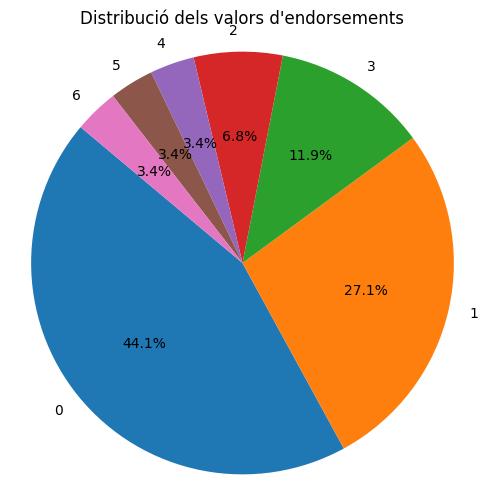

In [27]:
valors = df_proposals['endorsements/total_count'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(valors, labels=valors.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribució dels valors d'endorsements")
plt.axis('equal')
plt.show()

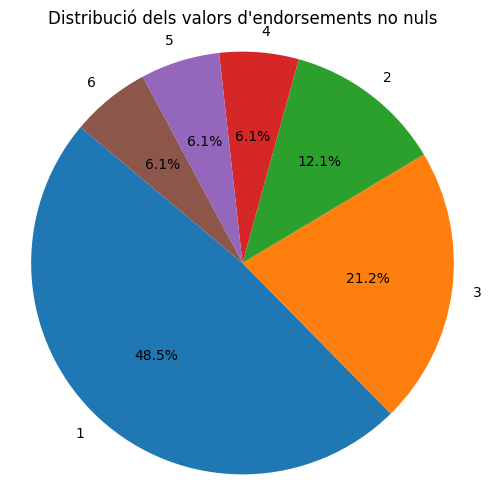

In [28]:
nou_dataset = df_proposals[df_proposals['endorsements/total_count'] > 0]
valors = nou_dataset['endorsements/total_count'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(valors, labels=valors.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribució dels valors d'endorsements no nuls")
plt.axis('equal')
plt.show()

Observem que, un 55.9% de les propostes ha obtingut almenys un endorsement, mentre que el 44.1% no n'ha obtingut cap. També cal destacar que gairebé la meitat de les propostes que han rebut endorsements (48.5%), només n'han rebut un.

##### Comments

In [29]:
print(df_proposals['comments'].unique())
print(df_proposals['comments'].nunique())
print(sum(df_proposals['comments']))
print(f"Màxim nombre de comentaris: {max(df_proposals['comments'])}")
print(f"Mínim nombre de comentaris: {min(df_proposals['comments'])}")

[0 1 2 3]
4
16
Màxim nombre de comentaris: 3
Mínim nombre de comentaris: 0


La columna `comments` representa en un valor numèric el nombre de comentaris que ha rebut cada proposta. Observem que el màxim nombre de comentaris que alguna proposta ha rebut és de 3 i que el mínim, és 0. Procedim a comprovar la distribució d'aquests valors. 

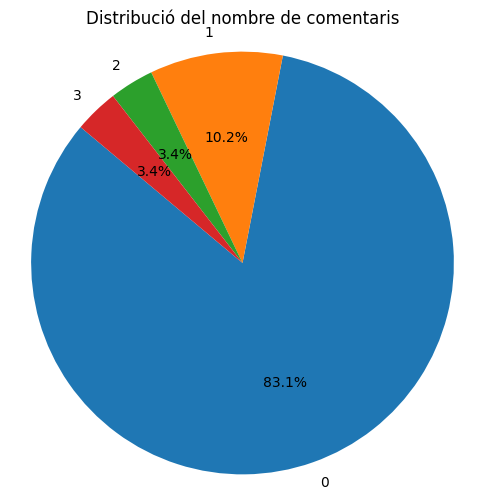

In [30]:
valors = df_proposals['comments'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(valors, labels=valors.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribució del nombre de comentaris")
plt.axis('equal')
plt.show()

In [31]:
print(f"Nombre de propostes amb 0 comentaris: {len(df_proposals[df_proposals['comments'] == 0])}")
print(f"Nombre de propostes amb més d'1 comentari: {len(df_proposals[df_proposals['comments'] > 0])}")

Nombre de propostes amb 0 comentaris: 49
Nombre de propostes amb més d'1 comentari: 10


Com es pot veure clarament, el 83.1% de les propostes no ha obtingut cap mena de comentari i que la resta, el 16.9%, n'ha rebut entre 1 i 3. Això es tradueix en que de 59 propostes, només 10 tenen un o més comentaris i que 49 no en tenen cap.

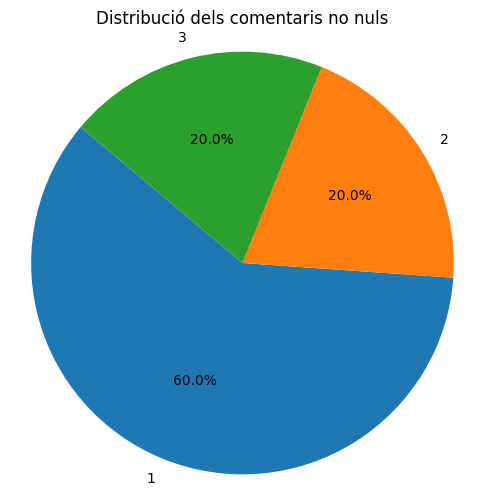

Nombre de propostes amb 1 comentari: 6
Nombre de propostes amb 2 comentaris: 2
Nombre de propostes amb 3 comentaris: 2


In [32]:
nou_dataset = df_proposals[df_proposals['comments'] > 0]
valors = nou_dataset['comments'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(valors, labels=valors.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribució dels comentaris no nuls")
plt.axis('equal')
plt.show()
print(f"Nombre de propostes amb 1 comentari: {len(nou_dataset[nou_dataset['comments'] == 1])}")
print(f"Nombre de propostes amb 2 comentaris: {len(nou_dataset[nou_dataset['comments'] == 2])}")
print(f"Nombre de propostes amb 3 comentaris: {len(nou_dataset[nou_dataset['comments'] == 3])}")

Observem clarament que dins de les 10 propostes que han rebut algun comentari, el 60% només n'ha rebut 1, el 20% ha rebut 2 comentaris i el 20% restant ha rebut 3 comentaris.

#### Attachments

In [33]:
print(df_proposals['attachments'].unique())
print(df_proposals['attachments'].nunique())
print(type(df_proposals['attachments'][0]))

[0]
1
<class 'numpy.int64'>


La columna `attachments` representa el nombre de fitxers adjuntats amb la proposta. S'observa que cap proposta té un nombre de fitxers adjunt diferent de zero

#### Followers

In [34]:
print(df_proposals['followers'].unique())
print(df_proposals['followers'].nunique())

[2 3 1 4 0]
5


La columna `followers` representa el nombre d'usuaris que segueixen la proposta per tal de mantenir-se informats de les seves actualitzacions. N'analitzem la seva distribució.

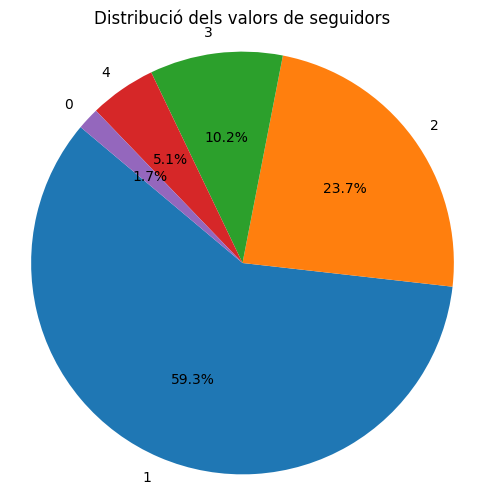

In [35]:
values = df_proposals['followers'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribució dels valors de seguidors")
plt.axis('equal')
plt.show()

També observem que la majoria de les propostes, amb un 59.3%, tenen un seguidor i que només l'1.7% de les propostes no tenen cap seguidor. En total, el 98.3% de les propostes tenen 1 o més seguidors.

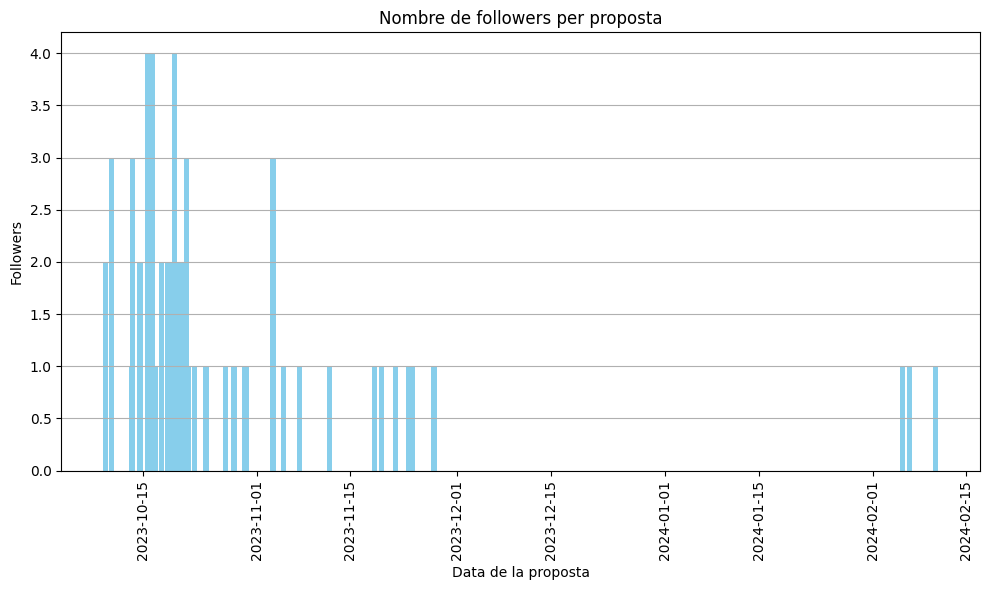

In [36]:
data = df_proposals['published_at']
followers = df_proposals['followers']
plt.figure(figsize=(10,6))
plt.bar(data, followers, color='skyblue')
plt.xlabel("Data de la proposta")
plt.ylabel("Followers")
plt.title("Nombre de followers per proposta")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Url

In [37]:
print(df_proposals['url'].unique())
print(df_proposals['url'].nunique())
print(type(df_proposals['url'][0]))

['http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87446'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87447'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87450'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87451'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87452'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87453'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87454'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87458'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87460'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87461'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87462'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87464'
 'http://participa.gencat.cat/processes/assembleacli

La columna `url` representa amb un string la url única de la pàgina web que porta a veure la proposta. Cada proposta té la seva url única que la representa.

#### Is_amend

In [38]:
print(df_proposals['is_amend'].unique())
print(df_proposals['is_amend'].nunique())
print(type(df_proposals['is_amend'][0]))

[False]
1
<class 'numpy.bool_'>


La columna `is_amend` representa amb un booleà si la proposta ha estat editada o corregida. En aquest cas, observem que cap de les propostes no ha estat editada.

### Comentaris

#### Id

In [39]:
print(df_comments['id'].nunique())
print(df_comments['id'].unique())
print(len(df_comments))

14
[53292 53315 53323 53324 53325 53328 53337 53355 53380 53408 53425 53426
 53467 53571]
14


La columna `id` conté el numero identificador de cada comentari que existeix a l'espai participatiu. No existeix cap comentari duplicat al dataset.

#### Created_at

In [40]:
df_comments['created_at'] = pd.to_datetime(df_comments['created_at'], utc=True)
print(f"Primer comentari en data: {min(df_comments['created_at'])}")
print(f"Última comentari en data: {max(df_comments['created_at'])}")

Primer comentari en data: 2023-10-12 08:55:08+00:00
Última comentari en data: 2024-01-11 10:13:22+00:00


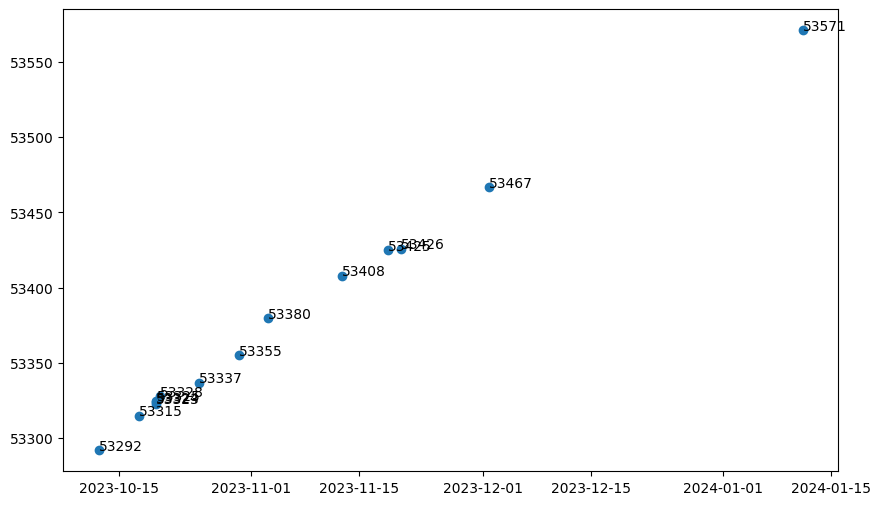

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_comments['created_at'], df_comments['id'])

for i, txt in enumerate(df_comments['id']):
    ax.annotate(txt, (df_comments['created_at'][i], df_comments['id'][i]))

La columna `created_at` representa la data en que es va crear el comentari, en format UTC. Observem que el primer comentari es va crear el dia 12-10-2023 i que l'últim es va crear el dia 11-01-2024. Així doncs, el temps entre el primer i l'últim comentari és de 2 mesos i 27 dies, és a dir, gairebé 3 mesos.

#### Body

In [42]:
print(df_comments['body'].unique())
print(df_comments['body'].nunique())
print(len(df_comments))
print(type(df_comments['body'][0]))

["L'emergència climàtica ens afecta a tots els habitants del planeta, humans i no humans.\nLa responsabilitat que tots hauriem d'assumir és la de deixar per a les generacions que ens seguiran la possibilitat de  gaudir d'un lloc on poder viure en harmonia amb la natura per poder tenir un futur viable per a tots els habitants del planeta.\n\nNo s'hi val inhibirse i molt menys negar que la humanitat està, juntament amb moltes altres espècies, en greu risc de desaparèixer si no som capaços de revertir les emissions dels gasos que estant causant aquesta emergència.\nCal que siguem molts més exigint a governs i industries, i a nosaltres mateixos individualment, accions per a donar un futur viable i sostenible. Cada pas en aquest sentit, per petit que pugui semblar, és una fita per als que vindran després de nosaltres."
 "Penso el mateix. A més us esteu gastant uns diners en publicitat a mitjans de comunicació que podriem entendre com enganyosa, ja que dieu que es una assamblea ciutadana i q

La columna `body` es tracta d'un string que representa el text del comentari. S'observa com existeixen 14 comentaris diferents i que en total existeixen 14 comentaris. Per tant això indica que no hi ha cap comentari duplicat.

#### Locale

In [43]:
print(df_comments['locale'].unique())
print(df_comments['locale'].nunique())

['ca' 'es']
2


La columna `locale` es tracta d'un string que representa l'idioma en el que ha estat escrit el comentari. S'observa que només hi ha 2 idiomes diferents, català, amb l'etiqueta 'ca', i castellà, amb l'etiqueta 'es'.

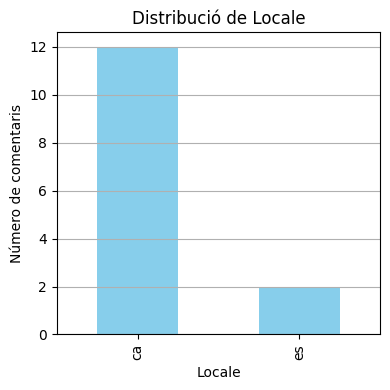

In [44]:
plt.figure(figsize=(4, 4))
df_comments['locale'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Locale')
plt.ylabel('Número de comentaris')
plt.title('Distribució de Locale')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observem que la distribució dels idiomes és molt dispar, ja que de 14 comentaris en total, 12 són en català i només 2 en castellà.

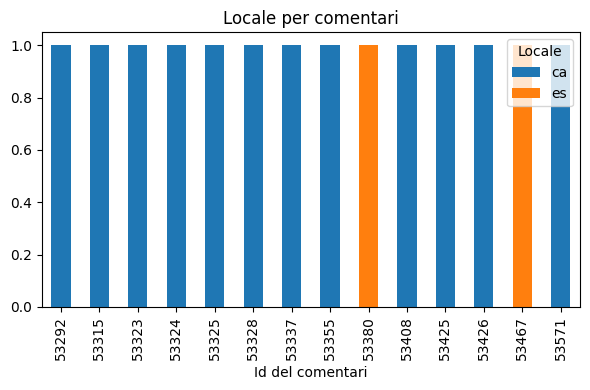

In [45]:
locales_by_id = df_comments.groupby('id')['locale'].value_counts().unstack(fill_value=0)
locales_by_id.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.xlabel('Id del comentari')
plt.title('Locale per comentari')
plt.legend(title='Locale')
plt.tight_layout()
plt.show()

#### Author/id

In [46]:
print(df_comments['author/id'].unique())
print(df_comments['author/id'].nunique())

[58730 59090 59319 34519 58219 59686 59951 60120 15201 60811 61509 61526]
12


La columna `author/id` es tracta d'un número identificatiu que representa l'uuid de l'autor del comentari. S'observa que de 14 comentaris totals, només 12 han estat escrits per autors diferents, per tant existeixen diferents comentaris escrits per la mateixa persona.

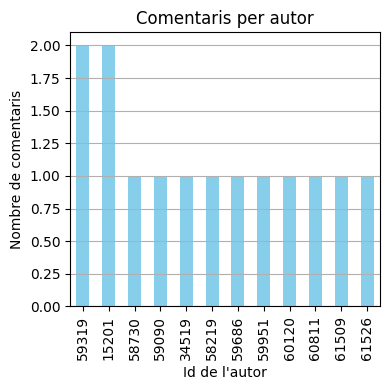

In [47]:
plt.figure(figsize=(4, 4))
df_comments['author/id'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Id de l'autor")
plt.ylabel('Nombre de comentaris')
plt.title('Comentaris per autor')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Author/name

In [48]:
print(df_comments['author/name'].unique())
print(df_comments['author/name'].nunique())

['JORGE MANUEL' 'MARC' 'Jordi Sanjuan Fuentes ' 'JOFRE' ' Alfred Ruiz'
 'JORDI' 'Nora Stalins' 'jackwilliam' 'ALBERT' 'GEMMA' 'Tommasso\tPalazzo'
 'Sònia\tTió Pratdesaba']
12


La columna `author/name` es tracta d'un string que conté el nom de l'autor del comentari. Tal com s'ha observat abans amb l'id de l'autor, existeixen 12 autors diferents i per tant hi ha diferents comentaris amb el mateix autor. Es veu clarament al gràfic de sota que tenen la mateixa distribució.

/home/arnau.berenguer@local.eurecat.org/eurecat_feina/analisi_participa_gencat/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


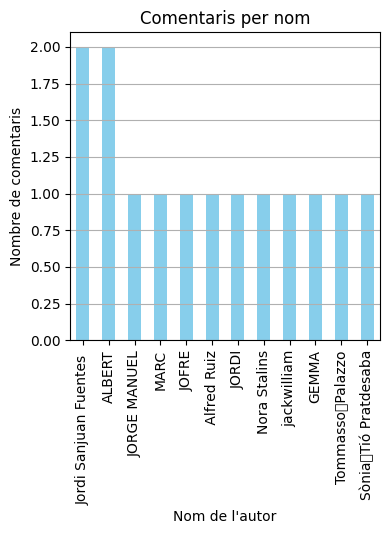

In [49]:
plt.figure(figsize=(4, 4))
df_comments['author/name'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Nom de l'autor")
plt.ylabel('Nombre de comentaris')
plt.title('Comentaris per nom')
plt.grid(axis='y')
plt.show()

#### Alignment

In [50]:
print(df_comments['alignment'].unique())
print(df_comments['alignment'].nunique())

[ 0  1 -1]
3


La columna `alignment` conté un valor numèric que representa el posicionament del comentari envers la proposta a la que pertany. Si està a favor, es representa amb un 1, si està en contra, es representa amb un -1 i si és neutre, es representa amb un 0.

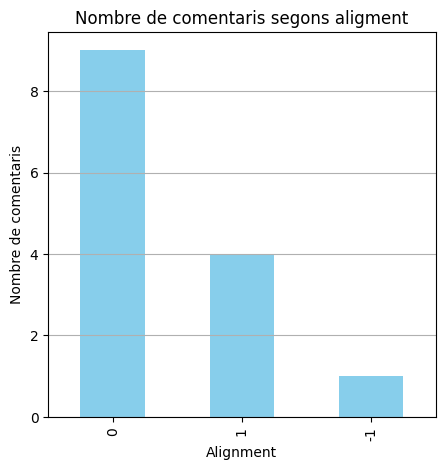

In [51]:
plt.figure(figsize=(5,5))
df_comments['alignment'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Alignment')
plt.ylabel('Nombre de comentaris')
plt.title('Nombre de comentaris segons aligment')
plt.grid(axis='y')
plt.show()

S'observa que la majoria de comentaris són neutres (9), mentre que només hi ha 1 comentari en contra, i 4 a favor.

#### Depth

In [52]:
print(df_comments['depth'].unique())
print(df_comments['depth'].nunique())
print(type(df_comments['depth'][0]))

[0]
1
<class 'numpy.int64'>


La columna `depth` conté un valor numèric que creiem que pot representar la profunditat de comentaris anidats que conté. No s'ha trobat cap mena d'informació a la documentació de l'api de Decidim i a més a més tots els valors són 0, per tant no tindrem aquesta columna en compte.

#### Commentable_id

In [53]:
print(df_comments['commentable_id'].unique())
print(df_comments['commentable_id'].nunique())

[87447 87461 87468 87450 87464 87504 87619 87628 87706 87582]
10


La columna `commentable_id` conté un valor numèric que representa l'identificador únic de la proposta a la que pertany el comentari. En aquest cas, totes les `commentable_id` han d'existir com a `id` del dataset anterior, df_proposals. En aquest cas s'observa que els 14 comentaris pertanyen en total a només 10 propostes diferents.

In [54]:
df_comments['commentable_id'].isin(df_proposals['id'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: commentable_id, dtype: bool

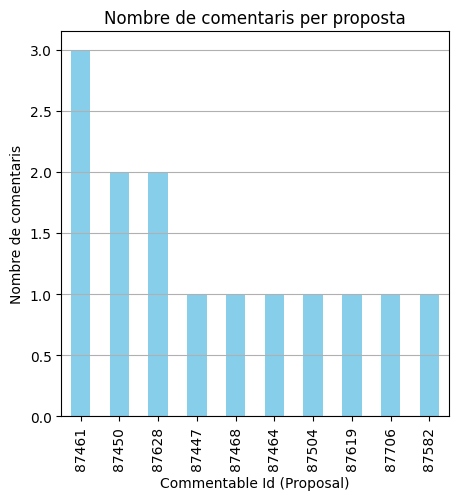

In [55]:
plt.figure(figsize=(5,5))
df_comments['commentable_id'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Commentable Id (Proposal)')
plt.ylabel('Nombre de comentaris')
plt.title('Nombre de comentaris per proposta')
plt.grid(axis='y')
plt.show()

#### Commentable_type

In [56]:
print(df_comments['commentable_type'].unique())
print(df_comments['commentable_type'].nunique())
print(type(df_comments['commentable_type'][0]))

['Decidim::Proposals::Proposal']
1
<class 'str'>


La columna `commentable_type` conté una string que representa el nom del model de Ruby On Rails a la que pertany el comentari. En aquest cas, totes pertanyen al mateix model 'Decidim::Proposals::Proposal'.

#### Root_commentable_url

In [57]:
print(df_comments['root_commentable_url'].unique())
print(df_comments['root_commentable_url'].nunique())
print(type(df_comments['root_commentable_url'][0]))

['http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87447'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87461'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87468'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87450'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87464'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87504'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87619'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87628'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87706'
 'http://participa.gencat.cat/processes/assembleaclima/f/3827/proposals/87582']
10
<class 'str'>


La columna `root_commentable_url` conté una string que representa la url de la proposta a la que pertany cada comentari. Tal com s'ha vist a l'anàlisi de la columna `commentable_id`, existeixen 10 urls de propostes diferents, ja que els 14 comentaris pertanyen només a 10 propostes diferents.

## Connexió dels datasets

Un cop s'ha entès bé quines columnes i quins valors té cada dataset és hora de tractar-les. Com s'ha vist amb anterioritat, hi ha columnes o files amb duplicats i una columna sense documentació què significa. Un cop tractades, es buscarà la manera de connectar el dataset de propostes amb el de comentaris.